<a href="https://colab.research.google.com/github/arafiardnsyh/toyota-stock-analysis/blob/main/toyota_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/arafiardnsyh/toyota-stock-analysis.git

import pandas as pd

# Upload file CSV
from google.colab import files
uploaded = files.upload()

# Memuat dataset ke dalam DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Menampilkan 5 baris pertama dari data
df.head()


Cloning into 'toyota-stock-analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


Saving Toyota_Data.csv to Toyota_Data (1).csv


,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409


In [ ]:
import pandas as pd

# Memuat dataset saham Toyota dari file CSV
data = pd.read_csv('Toyota_Data.csv')



In [ ]:
# Membagi data menjadi data pelatihan (80%) dan data pengujian (20%)
train_data = data.iloc[:-100]  # 80% untuk pelatihan
test_data = data.iloc[-100:]   # 20% untuk pengujian

# Menggunakan harga penutupan untuk ARIMA
train_data_close = train_data['Close']
test_data_close = test_data['Close']


In [ ]:
pip install statsmodels


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat dan melatih model ARIMA
model = ARIMA(train_data_close, order=(5,1,0))  # (p, d, q) - Sesuaikan parameter
model_fit = model.fit()

# Prediksi harga saham
predictions = model_fit.forecast(steps=len(test_data_close))


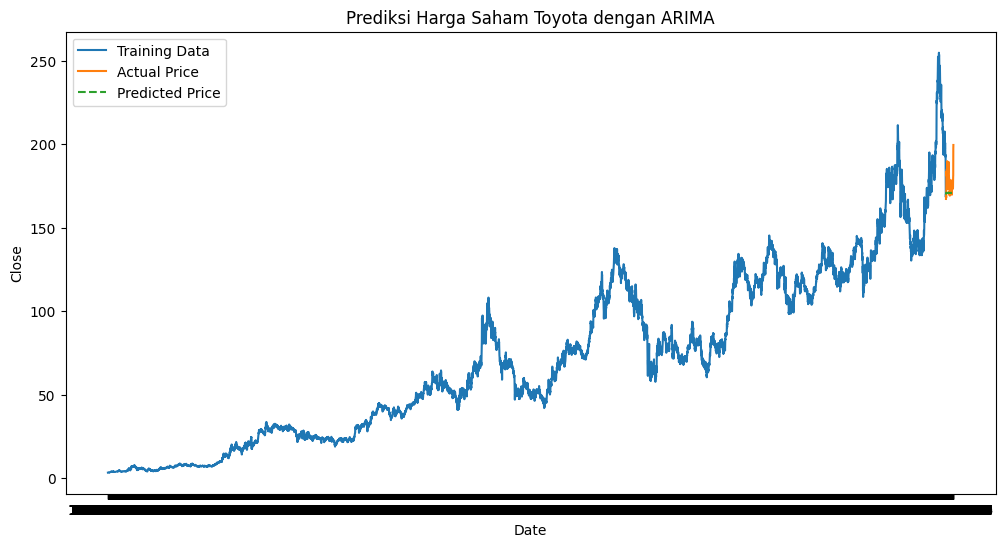

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi harga aktual vs prediksi
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data_close, label='Training Data')
plt.plot(test_data['Date'], test_data_close, label='Actual Price')
plt.plot(test_data['Date'], predictions, label='Predicted Price', linestyle='--')
plt.title('Prediksi Harga Saham Toyota dengan ARIMA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
# Menggunakan IQR untuk mendeteksi outliers
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outliers
data = data[~((data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR)))]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Menghitung MAE dan RMSE
mae = mean_absolute_error(test_data_close, predictions)
rmse = np.sqrt(mean_squared_error(test_data_close, predictions))

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Mean Absolute Error (MAE): 6.5460
Root Mean Squared Error (RMSE): 8.5726
